#Import Data

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CIV1498 Final Project/Data/cleaned_data3/period_bike_and_weather_new_header.csv')
df = df.drop(columns = 'Unnamed: 0')
df

,Time,Year,Month,Day,Period,Weekday,is_holiday,is_weekend,Mean Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Total Trips,Member Trips,Casual Trips,Mean Trip Duration (sec)
0,2017-01-01,2017,1,1,1,6,True,True,1.250000,-4.100000,67.666667,25.666667,33.500000,16.10,100.218333,Clear,69,65,4,593.086957
1,2017-01-01,2017,1,1,2,6,True,True,0.075000,-5.000000,68.750000,25.000000,28.750000,16.10,100.857500,Clear,18,18,0,491.555556
2,2017-01-01,2017,1,1,3,6,True,True,2.220000,-5.420000,57.200000,23.800000,20.200000,16.10,101.222000,Clear,116,96,20,784.103448
3,2017-01-01,2017,1,1,4,6,True,True,2.425000,-4.950000,58.250000,22.750000,17.250000,16.10,101.427500,Clear,171,141,30,697.105263
4,2017-01-01,2017,1,1,5,6,True,True,1.000000,-3.040000,74.600000,23.800000,12.600000,16.10,101.704000,Clear,108,92,16,691.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8970,2021-11-30,2021,11,30,1,1,False,False,-0.533333,-4.533333,74.500000,28.333333,9.166667,16.10,100.428333,Clear,135,42,93,612.377778
8971,2021-11-30,2021,11,30,2,1,False,False,-0.050000,-2.475000,84.750000,20.333333,9.750000,9.35,100.287500,Precipitation,821,318,503,687.566382
8972,2021-11-30,2021,11,30,3,1,False,False,1.480000,-0.080000,89.600000,18.666667,6.000000,13.68,100.130000,Clear,1085,411,674,626.935484
8973,2021-11-30,2021,11,30,4,1,False,False,2.650000,0.325000,84.750000,23.750000,16.750000,16.10,100.032500,Clear,1788,630,1158,695.394295


In [4]:
df.columns

Index(['Time', 'Year', 'Month', 'Day', 'Period', 'Weekday', 'is_holiday',
       'is_weekend', 'Mean Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)',
       'Wind Dir (10s deg)', 'Wind Spd (km/h)', 'Visibility (km)',
       'Stn Press (kPa)', 'Weather', 'Total Trips', 'Member Trips',
       'Casual Trips', 'Mean Trip Duration (sec)'],
      dtype='object')

#Label Encoding

In [5]:
input_cat_time = ['Year', 'Month', 'Day', 'Period', 'Weekday', 'is_holiday', 'is_weekend']
input_con_weather = ['Mean Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)',
                    'Wind Dir (10s deg)', 'Wind Spd (km/h)', 'Visibility (km)',
                    'Stn Press (kPa)']
input_cat_weather = ['Weather']
input = input_cat_time + input_con_weather + input_cat_weather
input_con = input_con_weather
input_cat = input_cat_time + input_cat_weather

output_total = ['Total Trips']
output_member = ['Member Trips']
output_casual = ['Casual Trips']
output = output_total + output_member + output_casual

In [6]:
X = df[input]
y = df[output]

In [7]:
X

,Year,Month,Day,Period,Weekday,is_holiday,is_weekend,Mean Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2017,1,1,1,6,True,True,1.250000,-4.100000,67.666667,25.666667,33.500000,16.10,100.218333,Clear
1,2017,1,1,2,6,True,True,0.075000,-5.000000,68.750000,25.000000,28.750000,16.10,100.857500,Clear
2,2017,1,1,3,6,True,True,2.220000,-5.420000,57.200000,23.800000,20.200000,16.10,101.222000,Clear
3,2017,1,1,4,6,True,True,2.425000,-4.950000,58.250000,22.750000,17.250000,16.10,101.427500,Clear
4,2017,1,1,5,6,True,True,1.000000,-3.040000,74.600000,23.800000,12.600000,16.10,101.704000,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8970,2021,11,30,1,1,False,False,-0.533333,-4.533333,74.500000,28.333333,9.166667,16.10,100.428333,Clear
8971,2021,11,30,2,1,False,False,-0.050000,-2.475000,84.750000,20.333333,9.750000,9.35,100.287500,Precipitation
8972,2021,11,30,3,1,False,False,1.480000,-0.080000,89.600000,18.666667,6.000000,13.68,100.130000,Clear
8973,2021,11,30,4,1,False,False,2.650000,0.325000,84.750000,23.750000,16.750000,16.10,100.032500,Clear


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_data = X.copy()
X_data['Year'] = label_encoder.fit_transform(X['Year'])
X_data['Month'] = label_encoder.fit_transform(X['Month'])
X_data['Day'] = label_encoder.fit_transform(X['Day'])
X_data['Period'] = label_encoder.fit_transform(X['Period'])
X_data['Weekday'] = label_encoder.fit_transform(X['Weekday'])
X_data['is_holiday'] = label_encoder.fit_transform(X['is_holiday'])
X_data['is_weekend'] = label_encoder.fit_transform(X['is_weekend'])

In [11]:
X_data['Weather'] = label_encoder.fit_transform(X['Weather'])

#Train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

print(X_train.shape[0]/X.shape[0])
print(X_val.shape[0]/X.shape[0])
print(X_test.shape[0]/X.shape[0])

0.6999442896935933
0.14997214484679666
0.15008356545961002


#Standardization

In [13]:
X_train

,Year,Month,Day,Period,Weekday,is_holiday,is_weekend,Mean Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
4051,2,2,21,1,4,0,0,3.400000,0.150000,79.250000,29.500000,16.500000,16.1,99.460000,0
4487,2,5,16,2,0,0,0,15.980000,11.280000,73.400000,8.000000,18.200000,16.1,100.744000,0
838,0,5,16,3,5,0,1,22.175000,18.875000,81.250000,7.500000,17.000000,16.1,99.745000,0
8897,4,10,14,2,0,0,0,4.620000,-1.260000,66.000000,30.800000,26.000000,16.1,100.240000,0
2374,1,3,19,4,4,0,0,4.900000,-5.220000,48.000000,32.200000,14.200000,16.1,102.136000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,3,1,20,4,4,0,0,-0.740000,-6.960000,63.000000,23.200000,38.800000,16.1,101.448000,0
5191,2,10,4,1,1,0,0,7.125000,2.450000,72.500000,26.000000,17.500000,16.1,100.787500,0
5390,2,11,14,0,6,0,1,2.400000,-1.683333,74.500000,27.000000,33.500000,16.1,99.121667,0
860,0,5,21,0,3,0,0,14.416667,12.066667,85.666667,26.200000,5.333333,16.1,100.568333,0


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_X.fit(X_train)
X_train_norm = scaler_X.transform(X_train)
X_val_norm = scaler_X.transform(X_val)
X_test_norm = scaler_X.transform(X_test)

X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_val_norm = pd.DataFrame(X_val_norm, columns = X_val.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

#F test

In [15]:
X_train_norm

,Year,Month,Day,Period,Weekday,is_holiday,is_weekend,Mean Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,0.50,0.181818,0.700000,0.25,0.666667,0.0,0.0,0.454463,0.535238,0.745399,0.812950,0.237976,1.000000,0.277014,0.0
1,0.50,0.454545,0.533333,0.50,0.000000,0.0,0.0,0.682465,0.747238,0.673620,0.194245,0.263527,1.000000,0.500435,0.0
2,0.00,0.454545,0.533333,0.75,0.833333,0.0,1.0,0.794744,0.891905,0.769939,0.179856,0.245491,1.000000,0.326605,0.0
3,1.00,0.909091,0.466667,0.50,0.000000,0.0,0.0,0.476575,0.508381,0.582822,0.850360,0.380762,1.000000,0.412737,0.0
4,0.25,0.272727,0.633333,1.00,0.666667,0.0,0.0,0.481649,0.432952,0.361963,0.890647,0.203407,1.000000,0.742648,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6277,0.75,0.090909,0.666667,1.00,0.666667,0.0,0.0,0.379429,0.399810,0.546012,0.631655,0.573146,1.000000,0.622934,0.0
6278,0.50,0.909091,0.133333,0.25,0.166667,0.0,0.0,0.521976,0.579048,0.662577,0.712230,0.253006,1.000000,0.508004,0.0
6279,0.50,1.000000,0.466667,0.00,1.000000,0.0,1.0,0.436339,0.500317,0.687117,0.741007,0.493487,1.000000,0.218143,0.0
6280,0.00,0.454545,0.700000,0.00,0.500000,0.0,0.0,0.654131,0.762222,0.824131,0.717986,0.070140,1.000000,0.469868,0.0


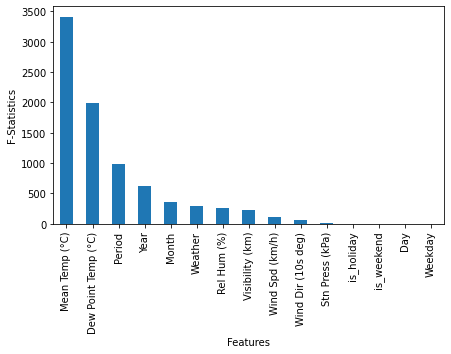

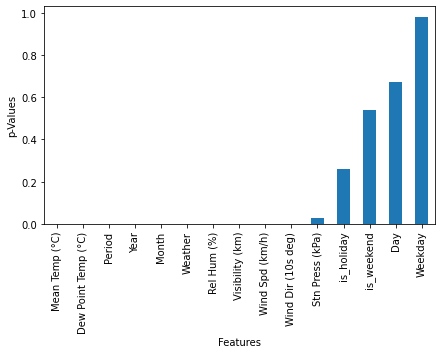

In [18]:
from sklearn.feature_selection import f_classif, f_regression

plt.figure(figsize = (7, 4))
f_scores = f_regression(X_train, y_train['Total Trips'])
f_sta = pd.Series(f_scores[0], index = X_train_norm.columns)
f_sta.sort_values(ascending = False, inplace = True)
f_sta.plot.bar()
plt.xlabel('Features')
plt.ylabel('F-Statistics')
plt.show()

plt.figure(figsize = (7, 4))
p_vals = pd.Series(f_scores[1], index = X_train_norm.columns)
p_vals.sort_values(ascending = True, inplace = True)
p_vals.plot.bar()
plt.xlabel('Features')
plt.ylabel('p-Values')
plt.show()

In [ ]:
p_vals

Temp (°C)               0.000000e+00
Dew Point Temp (°C)     0.000000e+00
period                 3.379682e-199
Year                   5.949742e-132
Month                   2.167032e-76
Weather                 7.280353e-65
Rel Hum (%)             1.953029e-55
Visibility (km)         7.278855e-51
Wind Spd (km/h)         3.597840e-26
Wind Dir (10s deg)      2.617077e-16
Stn Press (kPa)         2.927222e-02
is_holiday              2.587090e-01
is_weekend              5.389165e-01
Day                     6.728975e-01
Weekday                 9.835902e-01
dtype: float64

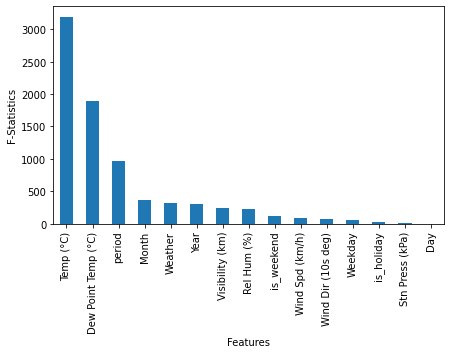

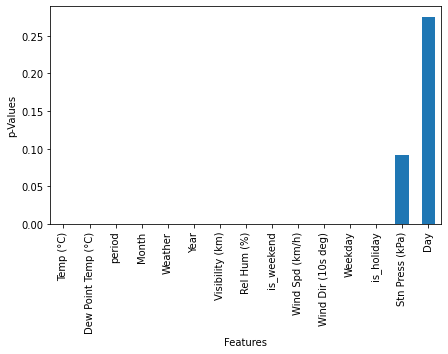

In [ ]:
plt.figure(figsize = (7, 4))
f_scores = f_regression(X_train, y_train['total member'])
f_sta = pd.Series(f_scores[0], index = X_train_norm.columns)
f_sta.sort_values(ascending = False, inplace = True)
f_sta.plot.bar()
plt.xlabel('Features')
plt.ylabel('F-Statistics')
plt.show()

plt.figure(figsize = (7, 4))
p_vals = pd.Series(f_scores[1], index = X_train_norm.columns)
p_vals.sort_values(ascending = True, inplace = True)
p_vals.plot.bar()
plt.xlabel('Features')
plt.ylabel('p-Values')
plt.show()

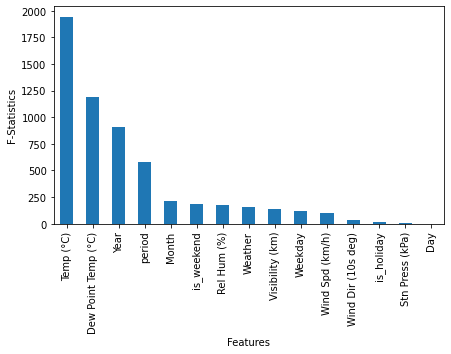

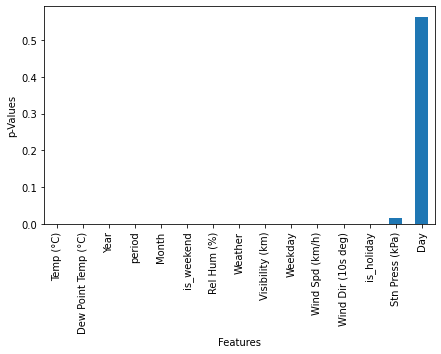

In [ ]:
plt.figure(figsize = (7, 4))
f_scores = f_regression(X_train, y_train['total casual'])
f_sta = pd.Series(f_scores[0], index = X_train_norm.columns)
f_sta.sort_values(ascending = False, inplace = True)
f_sta.plot.bar()
plt.xlabel('Features')
plt.ylabel('F-Statistics')
plt.show()

plt.figure(figsize = (7, 4))
p_vals = pd.Series(f_scores[1], index = X_train_norm.columns)
p_vals.sort_values(ascending = True, inplace = True)
p_vals.plot.bar()
plt.xlabel('Features')
plt.ylabel('p-Values')
plt.show()

#Predicting Total Trips

In [ ]:
#temperature & dew point temperature are highly correlated, so drop the dew point temperature.
#drop is_weekend, is_holiday, day, weekday

In [ ]:
X_data = X.drop(columns = ['Dew Point Temp (°C)'])
y_data = y

In [ ]:
X_data.columns

Index(['Year', 'Month', 'Day', 'period', 'Weekday', 'is_holiday', 'is_weekend',
       'Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

In [ ]:
input_cat = ['Year',
            'Month',
             'Day',
            'period',
            'Weekday',
             'is_holiday', 
             'is_weekend',
            'Weather']

In [ ]:
X_data = pd.get_dummies(X_data, columns = input_cat)
X_data.head()

,Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Year_2017,Year_2018,Year_2019,Year_2020,...,Weekday_4,Weekday_5,Weekday_6,is_holiday_False,is_holiday_True,is_weekend_False,is_weekend_True,Weather_Clear,Weather_Fog,Weather_Precipitation
0,1.250,67.666667,25.666667,33.50,16.1,100.218333,1,0,0,0,...,0,0,1,0,1,0,1,1,0,0
1,0.075,68.750000,25.000000,28.75,16.1,100.857500,1,0,0,0,...,0,0,1,0,1,0,1,1,0,0
2,2.220,57.200000,23.800000,20.20,16.1,101.222000,1,0,0,0,...,0,0,1,0,1,0,1,1,0,0
3,2.425,58.250000,22.750000,17.25,16.1,101.427500,1,0,0,0,...,0,0,1,0,1,0,1,1,0,0
4,1.000,74.600000,23.800000,12.60,16.1,101.704000,1,0,0,0,...,0,0,1,0,1,0,1,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

print(X_train.shape[0]/X.shape[0])
print(X_val.shape[0]/X.shape[0])
print(X_test.shape[0]/X.shape[0])

0.6999442896935933
0.14997214484679666
0.15008356545961002


In [ ]:
temp_mean = X_train['Temp (°C)'].mean()
temp_std = X_train['Temp (°C)'].std()

rh_mean = X_train['Rel Hum (%)'].mean()
rh_std = X_train['Rel Hum (%)'].std()

dir_mean = X_train['Wind Dir (10s deg)'].mean()
dir_std = X_train['Wind Dir (10s deg)'].std()

spd_mean = X_train['Wind Spd (km/h)'].mean()
spd_std = X_train['Wind Spd (km/h)'].std()

vis_mean = X_train['Visibility (km)'].mean()
vis_std = X_train['Visibility (km)'].std()

stress_mean = X_train['Stn Press (kPa)'].mean()
stress_std = X_train['Stn Press (kPa)'].std()

X_train['Temp (°C)'] = (X_train['Temp (°C)'] - temp_mean)/temp_std
X_train['Rel Hum (%)'] = (X_train['Rel Hum (%)'] - rh_mean)/rh_std
X_train['Wind Dir (10s deg)'] = (X_train['Wind Dir (10s deg)'] - dir_mean)/dir_std
X_train['Wind Spd (km/h)'] = (X_train['Wind Spd (km/h)'] - spd_mean)/spd_std
X_train['Visibility (km)'] = (X_train['Visibility (km)'] - vis_mean)/vis_std
X_train['Stn Press (kPa)'] = (X_train['Stn Press (kPa)'] - stress_mean)/stress_std

X_val['Temp (°C)'] = (X_val['Temp (°C)'] - temp_mean)/temp_std
X_val['Rel Hum (%)'] = (X_val['Rel Hum (%)'] - rh_mean)/rh_std
X_val['Wind Dir (10s deg)'] = (X_val['Wind Dir (10s deg)'] - dir_mean)/dir_std
X_val['Wind Spd (km/h)'] = (X_val['Wind Spd (km/h)'] - spd_mean)/spd_std
X_val['Visibility (km)'] = (X_val['Visibility (km)'] - vis_mean)/vis_std
X_val['Stn Press (kPa)'] = (X_val['Stn Press (kPa)'] - stress_mean)/stress_std

X_test['Temp (°C)'] = (X_test['Temp (°C)'] - temp_mean)/temp_std
X_test['Rel Hum (%)'] = (X_test['Rel Hum (%)'] - rh_mean)/rh_std
X_test['Wind Dir (10s deg)'] = (X_test['Wind Dir (10s deg)'] - dir_mean)/dir_std
X_test['Wind Spd (km/h)'] = (X_test['Wind Spd (km/h)'] - spd_mean)/spd_std
X_test['Visibility (km)'] = (X_test['Visibility (km)'] - vis_mean)/vis_std
X_test['Stn Press (kPa)'] = (X_test['Stn Press (kPa)'] - stress_mean)/stress_std


In [ ]:
X_train.to_csv('/content/drive/MyDrive/CIV1498 Final Project/Other/X_train.csv', index = False)
X_val.to_csv('/content/drive/MyDrive/CIV1498 Final Project/Other/X_val.csv', index = False)
X_test.to_csv('/content/drive/MyDrive/CIV1498 Final Project/Other/X_test.csv', index = False)

In [ ]:
y_train.to_csv('/content/drive/MyDrive/CIV1498 Final Project/Other/y_train.csv', index = False)
y_val.to_csv('/content/drive/MyDrive/CIV1498 Final Project/Other/y_val.csv', index = False)
y_test.to_csv('/content/drive/MyDrive/CIV1498 Final Project/Other/y_test.csv', index = False)
